# Power broadening

Power broadening and saturation are simple effects that can replicated using the rate equations.  This example shows how this works.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylcp

### Two levels with a single laser

This is the simplest case to consider.  We will plot up the scattering rate $R_{sc} = \sum_l R_{ge,l}(N_e-N_g)$, where $R_{ge, l}$ is the pumping rate due to laser $l$.   We can compare to the standard analytical expression for a two-level system

$$
    R_{sc} = \frac{1}{2}\frac{s}{1+s+4 \Delta^2/\Gamma^2},
$$

which is shown in the plots as the black dashed lines.

We start by generating the Hamiltonian.  Here, we use an $F=0\rightarrow F'=1$ transition as our model system, but we will consider coupling only two of these four states together using a circularly-polarized laser beam propogating along $\hat{z}$.

In [2]:
Hg, Bgq = pylcp.hamiltonians.singleF(F=0, muB=0)
He, Beq = pylcp.hamiltonians.singleF(F=1, muB=1)

dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(0, 1)

ham = pylcp.hamiltonian(Hg, He, Bgq, Beq, dijq)

Add in a constant, small magnetic field to establish a quantization axis along the $\hat{x}$ axis:

In [3]:
magField = lambda R: np.array([1e-5, 0.0, 0.0])

We next run through a loop of both detuning and intensity, remaking the single laser every time.  Note that it is $\sigma^-$ polarized relative to *both* its $k$ vector and the quantization axis.

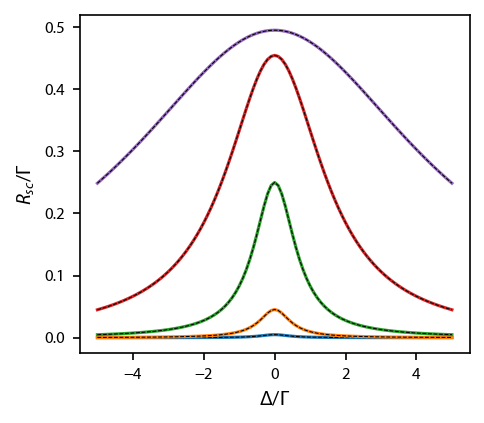

In [4]:
# Make two independent axes: dets/betas:
dets = np.arange(-5.0, 5.1, 0.1)
intensities = np.logspace(-2, 2, 5)

fig, ax = plt.subplots(nrows=1, ncols=1)
for intensity in intensities:
    Rijl = np.zeros(dets.shape)
    Neq = np.zeros(dets.shape + (4,))
    for ii, det in enumerate(dets):
        laserBeams = pylcp.laserBeams(
            [{'kvec':np.array([1., 0, 0.]),
              's':intensity, 'pol':-1, 'delta':det}]
        )
        
        rateeq = pylcp.rateeq(laserBeams, magField, ham)
        
        Neq[ii] = rateeq.equilibrium_populations(
            np.array([0., 0., 0.]),
            np.array([0., 0., 0.]),
            0.
        )
        
        Rijl[ii] = np.sum(rateeq.Rijl['g->e'], axis=2)[0][0]

    ax.plot(dets, Rijl*(Neq[:, 0]-Neq[:, 1]))
    ax.plot(dets, intensity/2/(1+intensity+4*dets**2), 'k--', linewidth=0.5)

ax.set_xlabel('$\Delta/\Gamma$')
ax.set_ylabel('$R_{sc}/\Gamma$');

### Coupling three states together

Instead of just considering a single laser coupling the $m_F=0$ and $m_F'=-1$, we can add in a second laser and consider coupling $m_F=0$ to $m_F'=+1$ as well.  We add this coupling laser by adding a counter propogating laser with the same circular polarization *relative to its $k$ vector*.  Relative to the quanitization axis, this laser has $\sigma^+$ light.

We then compare to the modified analytic formula

$$
    R_{sc} = \frac{1}{2}\frac{s}{1+3 s/2+4 \Delta^2/\Gamma^2},
$$

which is shown in the plot as black dashed lines.

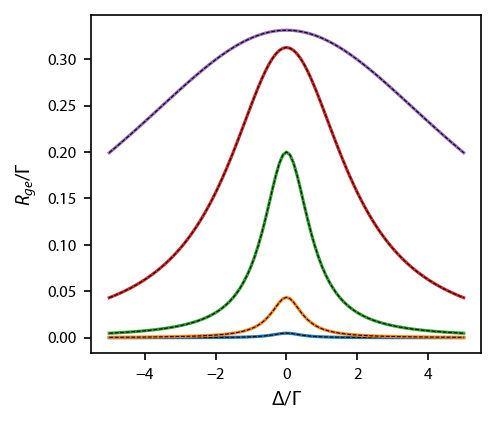

In [5]:
# Make two independent axes: dets/betas:
fig, ax = plt.subplots(nrows=1, ncols=1)
for intensity in intensities:
    Rijl = np.zeros(dets.shape + (2,))
    Neq = np.zeros(dets.shape + (4,))
    for ii, det in enumerate(dets):
        laserBeams = pylcp.laserBeams(
            [{'kvec':np.array([1., 0, 0.]),
              's':intensity, 'pol':-1, 'delta':det},
             {'kvec':np.array([-1., 0, 0.]),
              's':intensity, 'pol':-1, 'delta':det}]
        )
        
        rateeq = pylcp.rateeq(laserBeams, magField, ham)
        
        Neq[ii] = rateeq.equilibrium_populations(
            np.array([0., 0., 0.]),
            np.array([0., 0., 0.]),
            0.
        )
        
        Rijl[ii] = np.sum(rateeq.Rijl['g->e'], axis=2)[:, 0]

    ax.plot(dets, Rijl[:, 0]*(Neq[:, 0]-Neq[:, 1]))
    ax.plot(dets, intensity/2/(1+3*intensity/2+4*dets**2), 'k--', linewidth=0.5)

ax.set_xlabel('$\Delta/\Gamma$')
ax.set_ylabel('$R_{ge}/\Gamma$');